[Reference](https://medium.com/@arethaslsbl/working-with-python-for-data-analysis-ede075f3bc5f)

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tseries.offsets import BDay

In [2]:
#Data sources
path_od = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/order_detail.csv"
path_pd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/payment_detail.csv"
path_cd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/customer_detail.csv"
path_sd = "https://raw.githubusercontent.com/dataskillsboost/FinalProjectDA11/main/sku_detail.csv"
df_od = pd.read_csv(path_od)
df_pd = pd.read_csv(path_pd)
df_cd = pd.read_csv(path_cd)
df_sd = pd.read_csv(path_sd)

In [3]:
#Run SQL in Colab
from sqlite3 import connect
conn = connect(':memory:')
df_od.to_sql('order_detail',conn, index=False, if_exists='replace')
df_pd.to_sql('payment_detail', conn, index=False, if_exists='replace')
df_sd.to_sql('sku_detail', conn, index=False, if_exists='replace')
df_cd.to_sql('customer_detail', conn, index=False, if_exists='replace')


#SQL Query to join data
df = pd.read_sql("""
SELECT
    order_detail.*,
    payment_detail.payment_method,
    sku_detail.sku_name,
    sku_detail.base_price,
    sku_detail.cogs,
    sku_detail.category,
    customer_detail.registered_date
FROM order_detail
LEFT JOIN payment_detail
    on payment_detail.id = order_detail.payment_id
LEFT JOIN sku_detail
    on sku_detail.id = order_detail.sku_id
LEFT JOIN customer_detail
    on customer_detail.id = order_detail.customer_id
""", conn)

In [4]:
#Change data type
df = df.astype({"before_discount":'int', "discount_amount":'int', "after_discount":'int',"base_price":'int'})
df.dtypes

#Change data type in column Date to datetime
df['order_date']= pd.to_datetime(df['order_date'])
df['registered_date']= pd.to_datetime(df['registered_date'])
df.dtypes

id                         object
customer_id                object
order_date         datetime64[ns]
sku_id                     object
price                       int64
qty_ordered                 int64
before_discount             int64
discount_amount             int64
after_discount              int64
is_gross                    int64
is_valid                    int64
is_net                      int64
payment_id                  int64
payment_method             object
sku_name                   object
base_price                  int64
cogs                        int64
category                   object
registered_date    datetime64[ns]
dtype: object

In [6]:
df['year'] = df['order_date'].dt.year
df.head(5)

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,1,0,5,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,0,0,5,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,0,0,4,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,1,1,5,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,1,1,4,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021


In [7]:
#Make conditions
condition_1 = df['is_valid']==1
condition_2 = df['category']=='Mobiles & Tablets'
condition_3 = df['year']==2022

#Filter data with conditions
df_pro = df[(condition_1) & (condition_2) & (condition_3)]
df_pro

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,is_valid,is_net,payment_id,payment_method,sku_name,base_price,cogs,category,registered_date,year
20,ODR2268957100j,C813380L,2022-04-16,P619324,5626000,1,5626000,348000,5278000,1,1,1,7,Easypay,Samsung_Galaxy_S8_Plus_Black,5626000,4782100,Mobiles & Tablets,2022-04-05,2022
300,ODR4269164386x,C460487L,2022-09-06,P313303,518752,1000,518752000,0,518752000,1,1,1,2,jazzvoucher,IDROID_BALRX7-Gold,550942,484822,Mobiles & Tablets,2022-06-21,2022
334,ODR2855118495m,C835857L,2022-07-03,P754831,550942,26,14324492,0,14324492,1,1,1,16,financesettlement,IDROID_BALRX7-Jet black,550942,429722,Mobiles & Tablets,2022-03-04,2022
350,ODR1542623352b,C501323L,2022-07-23,P539142,3769942,3,11309826,0,11309826,1,1,0,4,Payaxis,cc_samsung_G935F-Blue,3614560,2530192,Mobiles & Tablets,2022-07-21,2022
355,ODR4709500777n,C179537L,2022-07-26,P652031,5170642,2,10341284,0,10341284,1,1,0,4,Payaxis,Samsung-Galaxy-S8-G955-Plus-Black,5170642,4033088,Mobiles & Tablets,2022-07-19,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204,ODR8298392594n,C168876L,2022-01-27,P754831,550942,5,2754710,0,2754710,1,1,1,1,cod,IDROID_BALRX7-Jet black,550942,429722,Mobiles & Tablets,2022-01-27,2022
1356,ODR9882171572h,C160493L,2022-06-05,P591007,2250342,1,2250342,0,2250342,1,1,1,1,cod,cc_samsung_A520-Gold,2170534,1801538,Mobiles & Tablets,2021-08-28,2022
1455,ODR7212779917l,C139855L,2022-01-22,P591474,1972000,1,1972000,0,1972000,1,1,0,1,cod,samsung_Samsung Galaxy J7 PRIME 2016-Gold,1943000,1515540,Mobiles & Tablets,2021-07-09,2022
1482,ODR2441502672n,C347731L,2022-07-08,P230358,1913942,1,1913942,0,1913942,1,1,0,4,Payaxis,cc_samsung_a320-Gold,1861800,1414968,Mobiles & Tablets,2022-08-05,2022


In [10]:
#Group data by product name (sku_name), sum and sort total of quantity (qty_ordered) and show top 5 products
df_top = df_pro.groupby(by=["sku_name"])["qty_ordered"].sum().reset_index().sort_values(by=["qty_ordered"], ascending=False)
df_top.head()

,sku_name,qty_ordered
1,IDROID_BALRX7-Gold,1000
2,IDROID_BALRX7-Jet black,31
3,Infinix Hot 4-Gold,15
43,samsung_Grand Prime Plus-Black,11
34,infinix_Zero 4-Grey,10


In [11]:
#Make conditions
condition_a = df['is_valid']==1
condition_b = df['year']==2021
condition_c = df['year']==2022

#Filter data by year 2021
df_1 = df[(condition_a) & (condition_b)]
df_1

#Group data by Category, sum the quantity
df_gb1 = df_1.groupby(by=["category"])["qty_ordered"].sum()
df_gb1

df_gb1_new = pd.DataFrame(df_gb1.reset_index(name='total_2021'))
df_gb1_new

,category,total_2021
0,Appliances,124
1,Beauty & Grooming,168
2,Books,171
3,Computing,109
4,Entertainment,77
5,Health & Sports,173
6,Home & Living,193
7,Kids & Baby,170
8,Men Fashion,237
9,Mobiles & Tablets,107


In [12]:
#Filter data by year 2022
df_2 = df[(condition_a) & (condition_c)]
df_2

#Group data by Category, sum the quantity
df_gb2 = df_2.groupby(by=["category"])["qty_ordered"].sum()
df_gb2

df_gb2_new = pd.DataFrame(df_gb2.reset_index(name='total_2022'))
df_gb2_new

,category,total_2022
0,Appliances,148
1,Beauty & Grooming,153
2,Books,195
3,Computing,153
4,Entertainment,150
5,Health & Sports,200
6,Home & Living,250
7,Kids & Baby,227
8,Men Fashion,175
9,Mobiles & Tablets,1154


In [13]:
#merge the two tables with left join
df_merged = pd.merge(df_gb1_new, df_gb2_new, how="left", on=["category"])
df_merged

,category,total_2021,total_2022
0,Appliances,124,148
1,Beauty & Grooming,168,153
2,Books,171,195
3,Computing,109,153
4,Entertainment,77,150
5,Health & Sports,173,200
6,Home & Living,193,250
7,Kids & Baby,170,227
8,Men Fashion,237,175
9,Mobiles & Tablets,107,1154


In [14]:
#Make a new column for quantity comparison between 2022 and 2021
df_merged['comparison'] = df_merged['total_2022']-df_merged['total_2021']

#Make an if condition
def condition(value):
    if value <= 0:
      return 'Decreased'
    else:
        return 'Increased'

#Make a new column for additional info and sort based on comparison value
df_merged['add_info'] = df_merged['comparison'].apply(condition)
df_merged.sort_values(by=["comparison"], ascending=False)

,category,total_2021,total_2022,comparison,add_info
9,Mobiles & Tablets,107,1154,1047,Increased
14,Women Fashion,140,489,349,Increased
13,Superstore,327,536,209,Increased
4,Entertainment,77,150,73,Increased
6,Home & Living,193,250,57,Increased
7,Kids & Baby,170,227,57,Increased
11,School & Education,184,237,53,Increased
3,Computing,109,153,44,Increased
5,Health & Sports,173,200,27,Increased
0,Appliances,124,148,24,Increased


In [15]:
#Make conditions
condition1 = df['is_valid']==1
condition2 = df['year']==2021
condition3 = df['year']==2022
condition4 = df['category']=='Others'

#Filter data by year 2021 and category 'Others'
df1 = df[(condition1) & (condition2) & (condition4)]
df1

#Group data by product name (sku_name), sum the quantity
df_gb1 = df1.groupby(by=["sku_name"])["qty_ordered"].sum()
df_gb1

df_gb1_new = pd.DataFrame(df_gb1.reset_index(name='total_2021'))
df_gb1_new

,sku_name,total_2021
0,Aladdin_Wrench_Snap N Grip_01,1
1,Aladdin_bike_cover,3
2,Am-PTV_ATS-004-M,5
3,BFV_Black Friday voucher Rs 1500,1
4,BFV_Black Friday voucher Rs 2000,1
...,...,...
82,sstop_Universallensclipkit,2
83,stoner_95160,1
84,stripyinterior_100006,1
85,tucano_IPD7AN-BK,1


In [20]:
#Make conditions
condition_1 = df['is_gross']==1
condition_2 = df['is_valid']==0
condition_3 = df['is_net']==0
condition_4 = df['year']==2022

#Filter data by conditions and only show customer_id and registered_date columns
df_customer = df[(condition_1) & (condition_2) & (condition_3) & (condition_4)]
df_cust = df_customer[['customer_id','registered_date']]
df_cust

#Drop any duplicates
df_cust.drop_duplicates()

,customer_id,registered_date
9,C246762L,2022-05-08
18,C848774L,2021-11-07
19,C693415L,2022-04-12
21,C180595L,2022-04-22
22,C587425L,2022-03-22
...,...,...
5855,C653797L,2022-04-03
5856,C394076L,2021-10-12
5859,C248585L,2022-07-10
5865,C471304L,2022-05-13


In [21]:
#Make new columns by extract day, month, and month number from order_date
df['day']=df['order_date'].dt.day_name()
df['month']=df['order_date'].dt.month_name()
df['month_num']=df['order_date'].dt.month
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,payment_method,sku_name,base_price,cogs,category,registered_date,year,day,month,month_num
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,jazzwallet,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021,Friday,November,11
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,jazzwallet,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021,Friday,November,11
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Payaxis,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021,Thursday,November,11
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,jazzwallet,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021,Monday,November,11
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Payaxis,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021,Sunday,November,11


In [22]:
#Make a new column to group Weekdays and Weekends
df['week'] =  ["weekend" if x in ["Saturday", "Sunday"] else "weekdays" for x in df['day']]
df.head()

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,sku_name,base_price,cogs,category,registered_date,year,day,month,month_num,week
0,ODR9939707760w,C713589L,2021-11-19,P858068,26100,200,5220000,2610000,2610000,1,...,RB_Dettol Germ Busting Kit-bf,26100,18270,Others,2021-07-07,2021,Friday,November,11,weekdays
1,ODR7448356649d,C551551L,2021-11-19,P886455,1971942,5,9859710,2464927,7394782,1,...,PS4_Slim-500GB,1971942,1321182,Entertainment,2021-11-20,2021,Friday,November,11,weekdays
2,ODR4011281866z,C685596L,2021-11-25,P678648,7482000,1,7482000,2065344,5416655,1,...,Changhong Ruba 55 Inches UD55D6000i Ultra HD T...,7482000,5162580,Entertainment,2021-11-19,2021,Thursday,November,11,weekdays
3,ODR3378927994s,C830683L,2021-11-22,P540013,3593680,1,3593680,1455440,2138239,1,...,dawlance_Inverter 30,3593680,3054628,Appliances,2021-11-03,2021,Monday,November,11,weekdays
4,ODR4904430099k,C191766L,2021-11-21,P491032,4413220,1,4413220,1059172,3354047,1,...,Dawlance_Inverter-45 2.0 ton,4413220,3177472,Appliances,2021-07-05,2021,Sunday,November,11,weekend


In [23]:
#Make conditions
condition_a = df['year']==2022
condition_b = df['is_valid']==1
condition_c = df['month_num'].isin([10, 11, 12])

#Filter data by conditions
df_camp = df[(condition_a) & (condition_b) & (condition_c)]
df_camp

,id,customer_id,order_date,sku_id,price,qty_ordered,before_discount,discount_amount,after_discount,is_gross,...,sku_name,base_price,cogs,category,registered_date,year,day,month,month_num,week
6,ODR7610732813d,C313534L,2022-12-01,P849301,2697000,1,2697000,809100,1887900,1,...,mitsubhisi_1.0 Ton - SRK-13CMK-CS,2697000,2373360,Appliances,2022-01-19,2022,Thursday,December,12,weekdays
7,ODR4415476736l,C215074L,2022-12-01,P918122,2533672,1,2533672,760101,1773570,1,...,lenovo_80HR00AKUE,2456010,2063002,Computing,2021-09-13,2022,Thursday,December,12,weekdays
34,ODR3138948564v,C609754L,2022-11-06,P622378,1195902,1,1195902,174000,1021902,1,...,AYS_32-32G6530,1195902,1076306,Entertainment,2022-06-22,2022,Sunday,November,11,weekend
35,ODR6438394533v,C795052L,2022-11-06,P196053,918952,1,918952,174000,744952,1,...,Delsey_384182100,918952,698378,Home & Living,2022-05-18,2022,Sunday,November,11,weekend
36,ODR1691826218q,C118563L,2022-11-06,P748128,762062,1,762062,174000,588062,1,...,HP_PRINTER-LJ-M102AW,762062,609638,Computing,2022-06-07,2022,Sunday,November,11,weekend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5614,ODR3662257747q,C825085L,2022-10-06,P887047,28710,1,28710,0,28710,1,...,BP_PS00398,28710,22388,Books,2022-06-05,2022,Thursday,October,10,weekdays
5777,ODR4690669141l,C856545L,2022-12-06,P194155,12818,1,12818,0,12818,1,...,Bahr-e-Shifa,0,0,Books,2022-06-25,2022,Tuesday,December,12,weekdays
5822,ODR7321143126q,C221220L,2022-10-02,P721905,8700,1,8700,0,8700,1,...,Paramount_9694941660,8700,5742,Books,2022-02-19,2022,Sunday,October,10,weekend
5828,ODR8470686220b,C951682L,2022-10-01,P849717,7540,1,7540,0,7540,1,...,Zia_147,7540,4640,Books,2021-07-27,2022,Saturday,October,10,weekend


In [24]:
#Make a pivot table and use average functions for before_discount and group by months
df_pivot = pd.pivot_table(df_camp,values=['before_discount'],index=['month'],columns=['week'],aggfunc=np.average)
df_pivot = df_pivot.round(2).sort_values(by=["month"], ascending=False)
df_pivot

before_discount           
week            weekdays    weekend
month                              
October        874690.27  634260.07
November       641862.00  607794.21
December       813574.29  410599.40

<ipython-input-25-bb1db540d3ed>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df_pivot.plot(kind='bar',


<Axes: title={'center': 'Average Total Sales Weekdays Vs Weekends on Oct - Dec 2022'}, xlabel='Month', ylabel='Average Total Sales'>

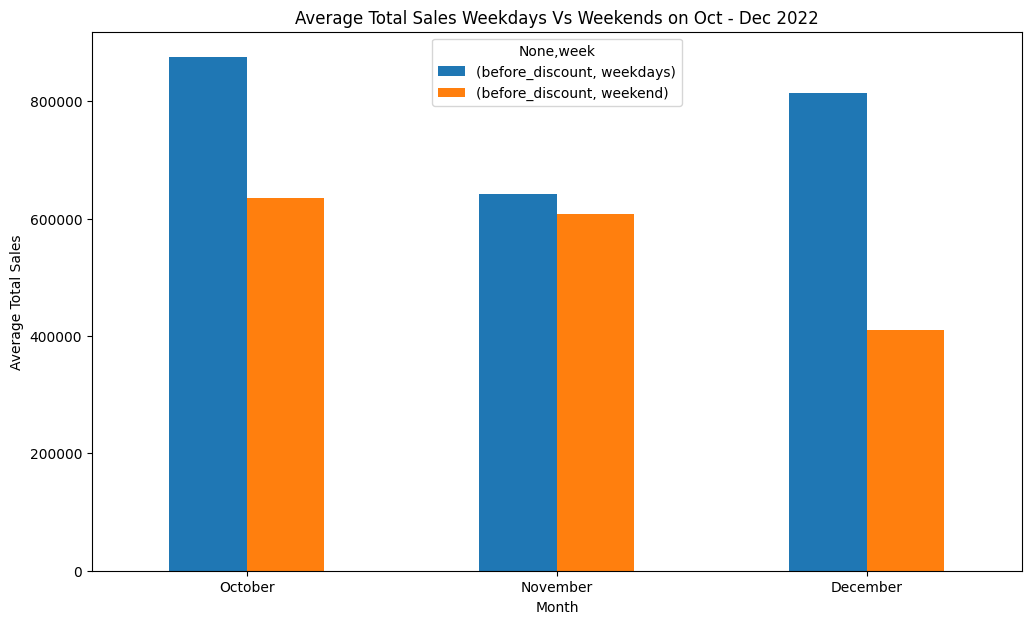

In [25]:
#Make a bar chart
df_pivot.plot(kind='bar',
           grid = False,
           xlabel = 'Month',
           ylabel = 'Average Total Sales',
           figsize=(12,7),
           rot = 0,
           title = 'Average Total Sales Weekdays Vs Weekends on Oct - Dec 2022',
           table = False,
           sort_columns = False,
           secondary_y = False)

In [26]:
#Make a pivot table and use average functions for before_discount
df_pivot = pd.pivot_table(df_camp,values=['before_discount'],columns=['week'],aggfunc=np.average)
df_pivot = df_pivot.round(2)
df_pivot

week,weekdays,weekend
before_discount,770146.01,558865.15


<ipython-input-27-30cd6223b050>:2: FutureWarning: `sort_columns` is deprecated and will be removed in a future version.
  df_pivot.plot(kind='bar',


<Axes: title={'center': 'Average Total Sales Weekdays Vs Weekends on Oct - Dec 2022'}, xlabel='Week', ylabel='Average Total Sales'>

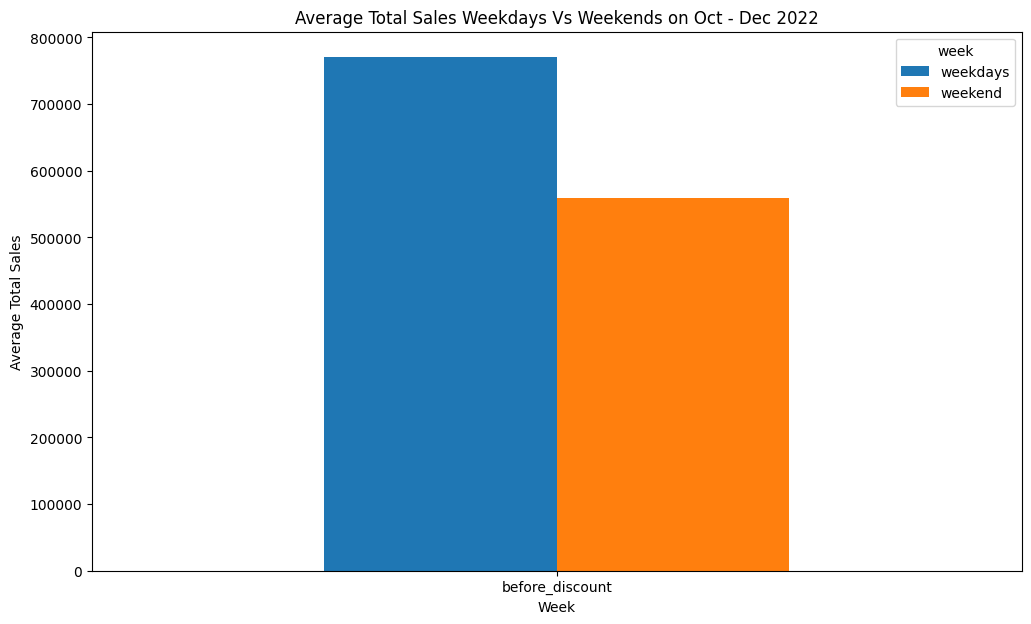

In [27]:
#Make a bar chart
df_pivot.plot(kind='bar',
           grid = False,
           xlabel = 'Week',
           ylabel = 'Average Total Sales',
           figsize=(12, 7),
           rot = 0,
           title = 'Average Total Sales Weekdays Vs Weekends on Oct - Dec 2022',
           table = False,
           sort_columns = False,
           secondary_y = False)